<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab5/B40_E22CSEU1183_SANCHIT/LAB_2/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

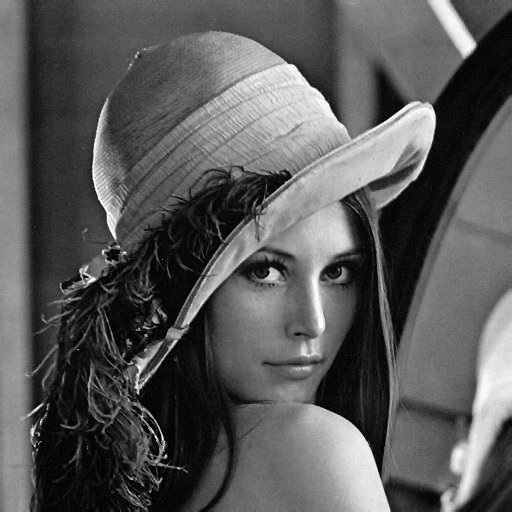

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('Lena_Image.png')
cv2_imshow(image)

width = 256
height = 256

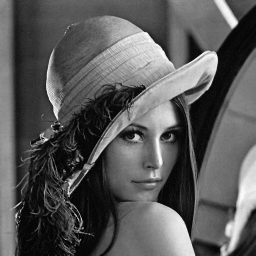

In [ ]:
resized_linear = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_linear)

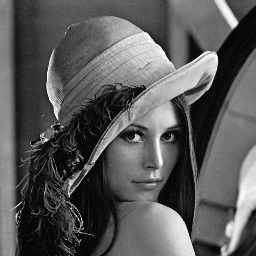

In [ ]:
resized_nearest = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_nearest)

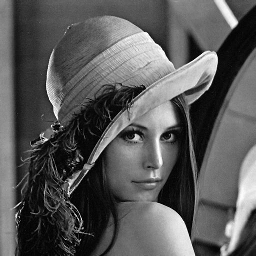

In [ ]:
resized_polynomial = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_polynomial)

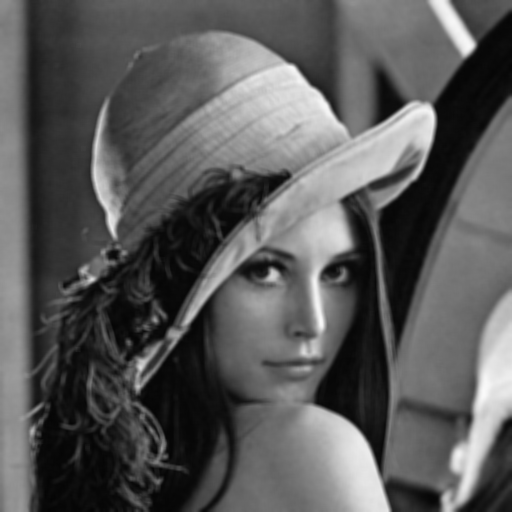

In [ ]:
box_blur = cv2.blur(image, (5, 5))
cv2_imshow(box_blur)

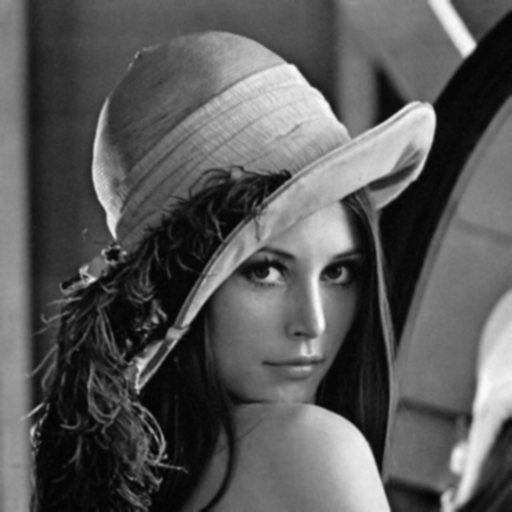

In [ ]:
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(gaussian_blur)

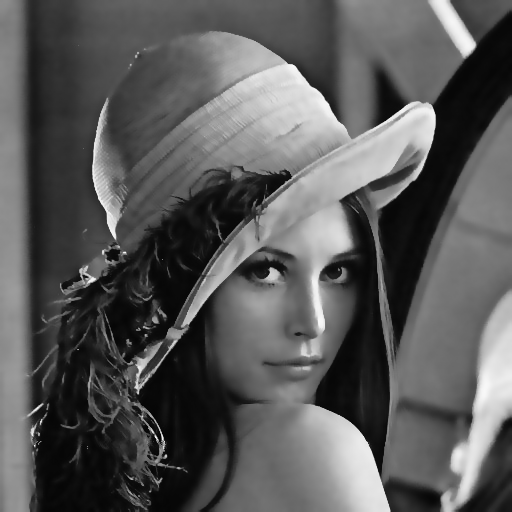

In [ ]:
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)
cv2_imshow(adaptive_blur)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algorithms
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    for train_index, val_index in kf.split(X_train):
        X_kf_train, X_val = X_train[train_index], X_train[val_index]
        y_kf_train, y_val = y_train[train_index], y_train[val_index]

        model.fit(X_kf_train, y_kf_train)
        y_pred = model.predict(X_test)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)

        # ROC & AUC
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            y_score = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=model.classes_[1])
        roc_auc = auc(fpr, tpr)

        # Collect results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F-Measure': f1,
            'Confusion Matrix': conf_matrix,
            'ROC AUC': roc_auc
        })

In [ ]:
# Convert results to pandas dataframe
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F-Measure,Confusion Matrix,ROC AUC
0,Naive Bayes,0.861111,0.880558,0.861111,0.861964,"[[31, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 24, 0, 0...",0.992685
1,Naive Bayes,0.855556,0.876930,0.855556,0.857024,"[[31, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 23, 1, 0...",0.985908
2,Naive Bayes,0.855556,0.869013,0.855556,0.852521,"[[31, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 23, 2, 0...",0.988597
3,Naive Bayes,0.822222,0.861862,0.822222,0.824865,"[[31, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 24, 0, 0...",0.986231
4,Naive Bayes,0.805556,0.856897,0.805556,0.809609,"[[32, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 18, 1, 0...",0.989565
5,SVM,0.986111,0.986324,0.986111,0.986138,"[[33, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 28, 0, 0...",1.000000
6,SVM,0.983333,0.983427,0.983333,0.983302,"[[33, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 28, 0, 0...",1.000000
7,SVM,0.988889,0.989102,0.988889,0.988921,"[[33, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 28, 0, 0...",1.000000
8,SVM,0.986111,0.986207,0.986111,0.986080,"[[33, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 28, 0, 0...",1.000000
9,SVM,0.986111,0.986324,0.986111,0.986138,"[[33, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 28, 0, 0...",1.000000
